In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso, LogisticRegression  #  For regression in Machine Learning
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
f2 = {"family":"cambria","color":"g","size":50}
f3  = {"family":"cambria","color":"k","size":40}
f1 = {"family":"cambria","color":"r","size":30}

In [2]:
data = pd.read_csv(r"C:\Users\Sinha Rahul\Downloads\train_u6lujuX_CVtuZ9i.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Display Top 10 row in dataset

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Display Tail 10 row in dataset

In [4]:
data.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Find the shape of our dataset(number of column & number of row)

In [5]:
data.shape

(614, 13)

In [6]:
print("the number of row",data.shape[0])
print("the number of column",data.shape[1])

the number of row 614
the number of column 13


# Getting information about our dataset likes total number of rows, total number of columns,data type of each column and memory requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Check null value in dataset

In [8]:
print("check null value", data.isnull().values.any())

check null value True


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# handling nissing value

In [11]:
data = data.drop('Loan_ID',axis=1)

In [12]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [13]:
columns = ["Gender","Dependents","LoanAmount","Loan_Amount_Term"]

In [14]:
data = data.dropna( subset = columns)

In [15]:
data.isnull().sum()/len(data)*100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [16]:
data["Self_Employed"].mode()[0]

'No'

In [17]:
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [18]:
data.isnull().sum()/len(data)*100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
data["Credit_History"].unique()

array([ 1.,  0., nan])

In [20]:
data["Credit_History"].mode()[0]

1.0

In [21]:
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mode()[0])

In [22]:
data.isnull().sum()/len(data)*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# Handling Categerical Columns

In [23]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
456,Male,Yes,0,Graduate,No,4301,0.0,118.0,360.0,1.0,Urban,Y
468,Female,Yes,2,Not Graduate,No,210,2917.0,98.0,360.0,1.0,Semiurban,Y
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
201,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
462,Male,Yes,0,Graduate,No,3015,2188.0,153.0,360.0,1.0,Rural,Y


In [24]:
data["Dependents"]

1       1
2       0
3       0
4       0
5       2
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 553, dtype: object

In [25]:
data["Dependents"].value_counts()

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64

In [26]:
data["Dependents"]=data["Dependents"].replace(to_replace = "3+", value = "4")

In [27]:
data["Dependents"].value_counts()

0    316
1     96
2     96
4     45
Name: Dependents, dtype: int64

In [28]:
data["Dependents"].unique()

array(['1', '0', '2', '4'], dtype=object)

# Data Visualization Education & Loan_Status

<AxesSubplot:xlabel='Education', ylabel='count'>

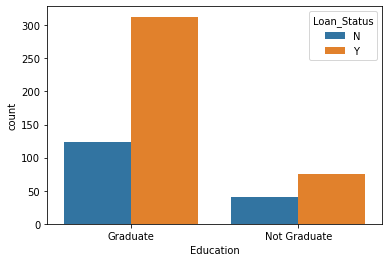

In [29]:
sns.countplot(x =  'Education', hue = 'Loan_Status', data = data )

In [30]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
data["Married"].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [33]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [34]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
data["Property_Area"].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [36]:
data["Loan_Status"].unique()

array(['N', 'Y'], dtype=object)

In [51]:
data = data.replace({"Married":{"Yes":0,"No":1},"Gender":{"Male":1,"Female":0},"Self_Employed":{"No":0,"Yes":1},
             "Property_Area":{"Rural":0,"Urban":1,"Semiurban":2},
             "Education":{"Graduate":1,"Not Graduate":1},
             "Loan_Status":{"N":0,"Y":1}})

In [52]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,0,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,0,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,0,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


# store feature matrix in x and response target in vector y

In [53]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [54]:
x = data.drop("Loan_Status",axis = 1)

In [55]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1
4,1,1,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,0,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,0,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,0,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [56]:
y = data["Loan_Status"]

In [57]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64

# Feature Scalling

In [62]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [63]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [66]:
col = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [67]:
st = StandardScaler()

In [69]:
x[col] = st.fit_transform(x[col])

In [70]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,0,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,0,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,0,0,1,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,1,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,0,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,0,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,0,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,0,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


# Train Test Split

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2)

In [72]:
print(x.shape,x_train.shape,x_test.shape)

(553, 11) (414, 11) (139, 11)


# Logistic Regression

In [82]:
log = LogisticRegression() 

In [83]:
logist = log.fit(x_train,y_train)
logist

LogisticRegression()

In [84]:
y_predi = log.predict(x_test)
y_predi

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [86]:
accuracy_score(y_test,y_predi)

0.8129496402877698

In [87]:
accuracy_score(y_test,y_predi,normalize=True)

0.8129496402877698

# support vactor machine model

In [73]:
model = SVC()

In [74]:
model.fit(x_train,y_train)

SVC()

# model evalution

In [103]:
x_train_predication = model.predict(x_train)

In [102]:
x_test_predication = model.predict(x_test)

In [80]:
training_data_accuracy = accuracy_score(y_test,x_test_predication)
training_data_accuracy

0.8057553956834532

In [81]:
training_data_accuracy = accuracy_score(y_train,x_train_predication)
training_data_accuracy

0.8188405797101449

# Tune Parameter

# 1. Regulazation(C)

In [94]:
model_c = SVC(C = 1)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.8057553956834532

In [95]:
model_c = SVC(C = 10)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.7913669064748201

# 2.Gamma

In [96]:
model_c = SVC(gamma = 1)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.7769784172661871

In [97]:
model_c = SVC(gamma = 10)
model_c.fit(x_train,y_train)
model_c.score(x_test,y_test)

0.6834532374100719

# 3.kernal

In [98]:
model_linear_kernal = SVC(kernel = "linear")
model_linear_kernal.fit(x_train,y_train)
model_linear_kernal.score(x_test,y_test)

0.8057553956834532

In [99]:
model_linear_kernal = SVC(kernel = "poly")
model_linear_kernal.fit(x_train,y_train)
model_linear_kernal.score(x_test,y_test)

0.7697841726618705

In [100]:
model_linear_kernal = SVC(kernel = "poly")
model_linear_kernal.fit(x_train,y_train)
model_linear_kernal.score(x_test,y_test)

0.7697841726618705

In [101]:
model_linear_kernal = SVC(kernel = "rbf")
model_linear_kernal.fit(x_train,y_train)   # defult parameter is rbf
model_linear_kernal.score(x_test,y_test)

0.8057553956834532